<a href="https://colab.research.google.com/github/emilio-reyesb/Tarea-2/blob/main/Copia_de_Tarea2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [ ]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [ ]:
# Haga el cálculo aquí

# Calculamos los 0,5 grados en mas/yr con regla de 3 (unidad queda en [mas])
gr = 0.5 * 3.6*(10**6)
# como 1 [mas] -> 1 año entonces con regla de 3 quedamos en que la cantidad de años coincide con el valor de gr


# visualizamos resultado
print(gr)


1800000.0


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [ ]:
path_archivo = '/content/drive/MyDrive/ngc5694_pm.csv'    # buscamos la ruta
data = pd.read_csv(path_archivo)                          # leemos el archivo y lo nombramos

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [ ]:
# Muestra las columnas aquí
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [ ]:
# Muestra el DataFrame aquí

data.head(10)       # se muestran los primeros 10 elementos

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
5,5,219.359785,-27.111371,-0.857753,-1.178311
6,6,219.370317,-26.963460,-0.530987,-0.564592
7,7,219.365531,-26.966464,-0.866077,-0.659245
8,8,219.516236,-27.078855,-0.414927,-0.439393
9,9,219.628222,-27.030709,0.260185,-1.312268


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [ ]:
pmra = data['pmra']
pmdec = data['pmdec']

Text(0, 0.5, 'pmdec')

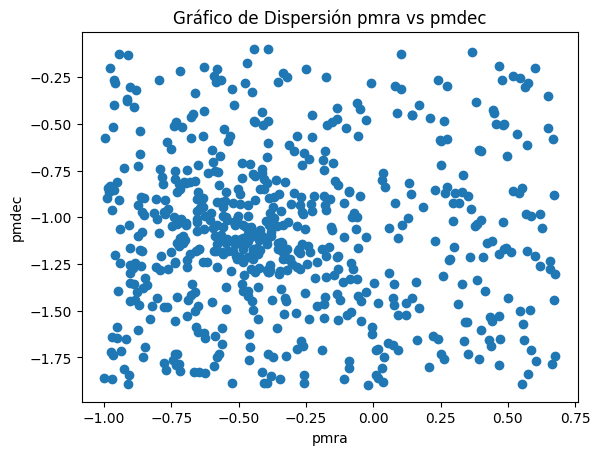

In [ ]:
# Haga el gráfico en esta celda

plt.scatter(pmra, pmdec)                  # ploteamos

plt.title('Gráfico de Dispersión pmra vs pmdec')        # titulo
plt.xlabel('pmra')
plt.ylabel('pmdec')

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [ ]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [ ]:
from scipy.stats import norm

x_pmra = np.linspace(-1.5, 1, 300)                       # arreglo de 300 numeros entre -1.5 y 1
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)            # aplicamos la funcion

x_pmdec =  np.linspace(-2.5, 0.5, 300)                   # arreglo de 300 numeros entre -2.5 y 0.5
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)        # aplicamos la funcion


### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

Text(0.5, 1.0, 'Histograma de pmra con gaussiana')

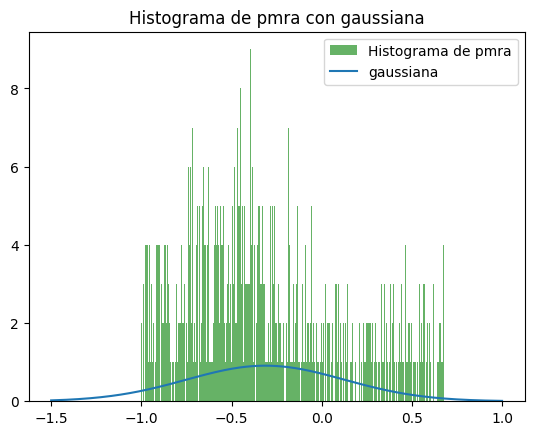

In [ ]:
plt.hist(pmra, bins=300, density=False, alpha=0.6, color='g', label='Histograma de pmra')   # ploteamos histograma
plt.plot(x_pmra, fx_pmra, label = 'gaussiana')                                              # ploteamos gaussiana
plt.legend()                                                                                # agregamos leyenda
plt.title('Histograma de pmra con gaussiana')                                               # agregamos titulo

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

Text(0.5, 1.0, 'Histograma de pmdec con gaussiana')

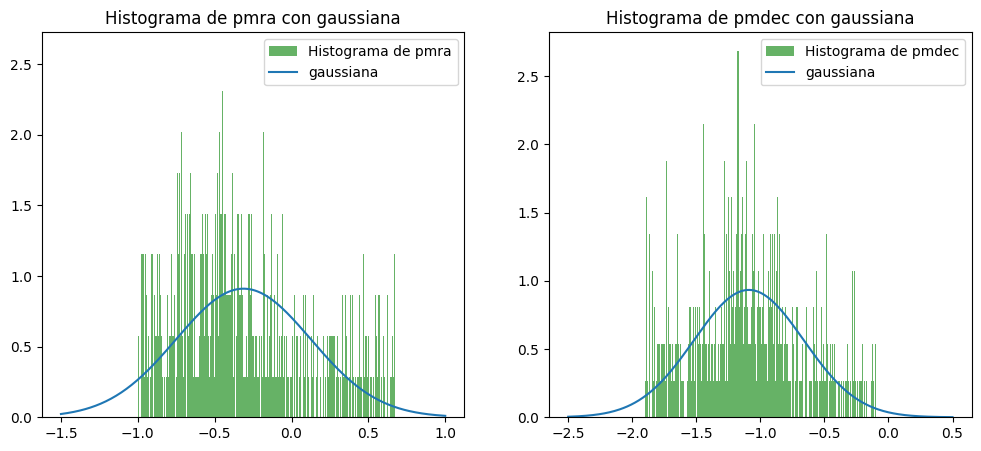

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))                                          # creamos 2 subplots

ax1.hist(pmra, bins=300, density=True, alpha=0.6, color='g', label='Histograma de pmra')       # ploteamos en la izquierda pmra
ax1.plot(x_pmra, fx_pmra, label = 'gaussiana')                                                 # gaussiana  a la izquierda
ax1.legend()                                                                                   # agregamos leyenda
ax1.set_title('Histograma de pmra con gaussiana')                                              # agregamos titulo


ax2.hist(pmdec, bins=300, density=True, alpha=0.6, color='g', label='Histograma de pmdec')     # ploteamos en la izquierda pmdec
ax2.plot(x_pmdec, fx_pmdec, label = 'gaussiana')                                               # gaussiana  a la izquierda
ax2.legend()                                                                                   # agregamos leyenda
ax2.set_title('Histograma de pmdec con gaussiana')                                             # agregamos titulo

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

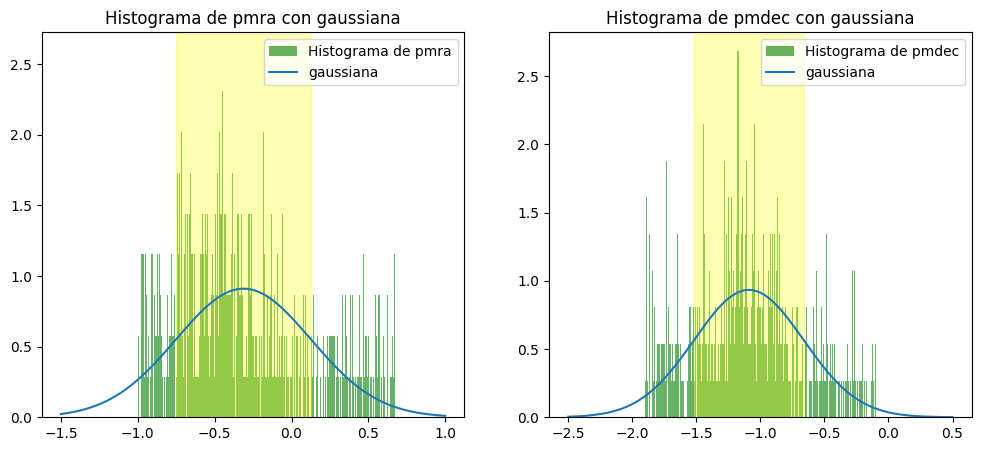

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))                                          # creamos 2 subplots

ax1.hist(pmra, bins=300, density=True, alpha=0.6, color='g', label='Histograma de pmra')       # ploteamos en la izquierda pmra
ax1.plot(x_pmra, fx_pmra, label = 'gaussiana')                                                 # gaussiana  a la izquierda
ax1.legend()                                                                                   # agregamos leyenda
ax1.set_title('Histograma de pmra con gaussiana')                                              # agregamos titulo


ax2.hist(pmdec, bins=300, density=True, alpha=0.6, color='g', label='Histograma de pmdec')     # ploteamos en la izquierda pmdec
ax2.plot(x_pmdec, fx_pmdec, label = 'gaussiana')                                               # gaussiana  a la izquierda
ax2.legend()                                                                                   # agregamos leyenda
ax2.set_title('Histograma de pmdec con gaussiana')                                             # agregamos titulo

# Agregar la franja vertical para pmra
ax1.axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color='yellow', alpha=0.3)

# Agregar la franja vertical para pmdec
ax2.axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color='yellow', alpha=0.3)

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Se puede afirmar que es una buena estimacion ya que la mayor cantidad de datos se concentran en la franja amarilla y en consecuencia siguen una distribucion normal.

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [ ]:
# Lea y muestre el DataFrame aquí

path = '/content/drive/MyDrive/data_spectra.csv'    # buscamos la ruta
data2 = pd.read_csv(path)                           # leemos el archivo y lo nombramos
data2.head(10)                                      # se muetsran los primeros 10 elementos del DataFrame



,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
5,5,13899.273748,0.919151,1.358400,1.347122,1.296573,1.289028,0.610227,0.678171,1.025992,...,0.638233,0.889149,0.688446,1.159876,1.324555,1.394010,0.976434,0.996779,0.902522,0.812551
6,6,13900.496737,1.146592,0.649125,0.606552,0.764381,0.986042,1.169505,1.347068,1.327184,...,1.002957,0.926086,1.351365,1.152762,1.021284,1.187816,0.659958,1.261469,1.053260,1.388193
7,7,13901.719727,1.129581,0.971864,1.031087,0.836858,0.783988,0.657929,1.257945,1.240843,...,0.730249,0.623041,1.172950,0.804725,1.309663,0.646853,1.254253,0.970611,0.664310,1.396251
8,8,13902.942716,1.061680,0.737761,0.868106,1.298075,0.988404,1.343663,0.614023,0.849140,...,0.622240,1.207229,1.061244,0.689349,1.014547,1.079259,1.351131,0.605414,1.215670,1.035637
9,9,13904.165705,1.023624,1.225367,1.336704,1.088226,0.918456,1.058943,1.108686,1.230231,...,0.768321,0.718509,1.306463,0.665183,1.000925,1.189598,1.030669,0.928813,1.351778,0.783566


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** se ven 3 lineas de emision sobresalientes a el resto.

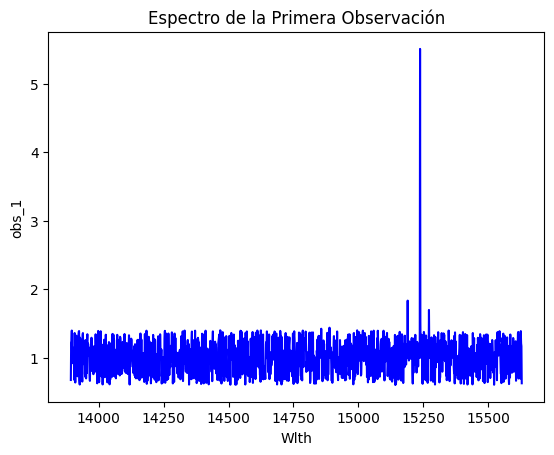

In [ ]:
obs_1 = data2['obs_1']            # datos obs 1
Wlth = data2['Wlth']              # datos Wlth

# ploteamos

plt.plot(Wlth, obs_1, color='blue')
plt.xlabel('Wlth')
plt.ylabel('obs_1')
plt.title('Espectro de la Primera Observación')
plt.show()

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Se va a sacar el promedio a los datos de obs_1 y luego se le va a restar a estos mismos para que quede centrado en 0.

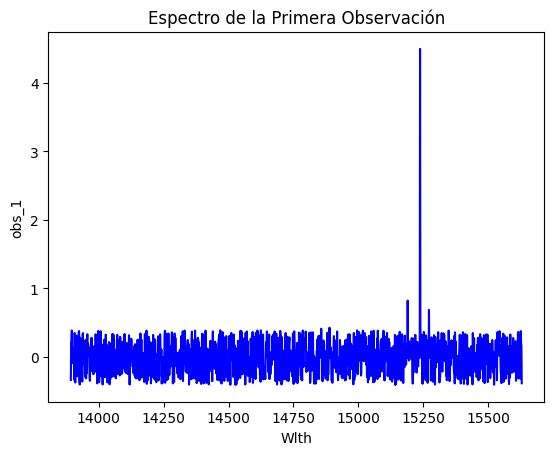

In [ ]:
# media de datos obs_1
mu_obs_1 = obs_1.mean()

# centramos en 0 los datos de obns_1
obs_1_centrada = obs_1 - mu_obs_1

# Grafique el espectro centrado en 0 aquí
plt.plot(Wlth, obs_1_centrada, color='blue')
plt.xlabel('Wlth')
plt.ylabel('obs_1')
plt.title('Espectro de la Primera Observación')
plt.show()

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [ ]:
# datos de obs_1
mu_obs_1 = obs_1.mean()          # media
std_obs_1 = obs_1.std()          # desviacion

# Definimos los limites
inf = mu_obs_1 - 3 * std_obs_1
sup = mu_obs_1 + 3 * std_obs_1

# Filtramos datos
ruido = obs_1[(obs_1 >= inf) & (obs_1 <= sup)]

2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

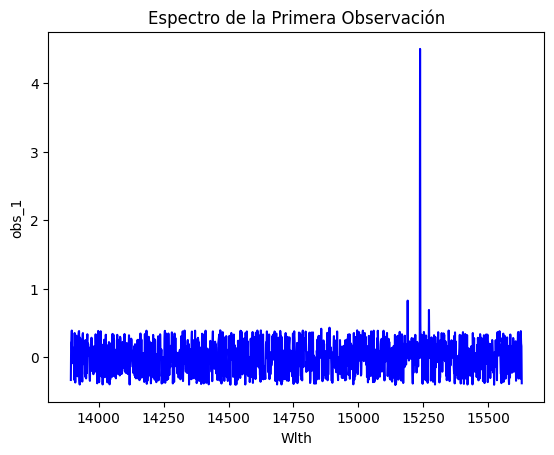

In [ ]:
# media ruido
mu_r = ruido.mean()

# centramos los datos
obs_1_centrada = obs_1 - mu_r

# Grafique el espectro centrado en 0 aquí
plt.plot(Wlth, obs_1_centrada, color='blue')
plt.xlabel('Wlth')
plt.ylabel('obs_1')
plt.title('Espectro de la Primera Observación')
plt.show()


3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** n=1 pues podemos tener emisiones que no se esten viendo por el ruido. Por lo que se espera bajar estos valores a lo menos a valores inferiores a los datos que tenemos para que asi se puedan observar posibles emisiones que que esten siendo tapadas.

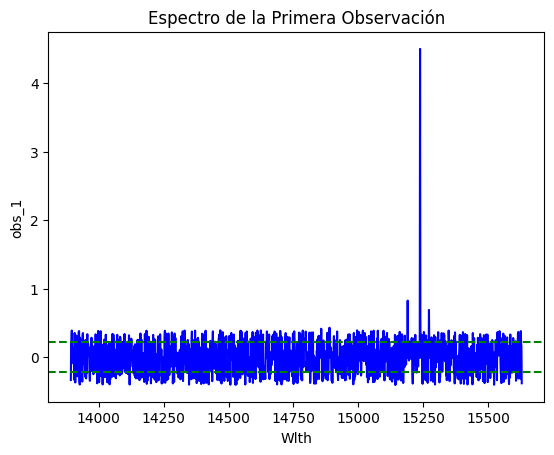

In [96]:
# calculamos desviacion estandard del ruido
std_ruido = ruido.std()

# graficamos lo anterior
plt.plot(Wlth, obs_1_centrada, color='blue')
plt.xlabel('Wlth')
plt.ylabel('obs_1')
plt.title('Espectro de la Primera Observación')

# graficamos un margen
n = 1
plt.axhline(y = n*std_ruido, color = 'green', linestyle = '--' )         # linea limite superior
plt.axhline(y = -n*std_ruido, color = 'green', linestyle = '--' )         # linea limite inferior


### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [ ]:
# identificamos columnas con las que queremos trabajar
obs_col = [col for col in data2.columns if col.startswith('obs')]

# recorremos para cada columna y realizamops el trabajo anterior
for columna in obs_col:
  mu_col = data2[columna].mean()                # se calcula la media para cada columna
  data2[columna] = data2[columna] - mu_col      # vamos centrando columna por columna

# comprobamos si se centraron las columnas
data2

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,-0.338588,0.044869,0.129951,0.359538,0.198188,-0.227115,-0.221368,-0.289408,...,-0.158839,-0.164819,-0.044796,-0.102306,-0.271097,-0.114529,-0.233486,0.209442,-0.056625,-0.288435
1,1,13894.381791,0.206785,0.380884,-0.358213,0.280566,0.216748,0.290946,0.290598,-0.033806,...,-0.217811,-0.199941,0.105639,0.232304,-0.249997,-0.069033,0.021967,0.117012,0.385879,-0.207690
2,2,13895.604780,0.232843,-0.227997,0.207029,-0.107603,0.196148,0.126021,0.134662,-0.367846,...,0.211120,0.088938,-0.138135,0.233443,-0.077108,-0.053264,0.277885,-0.387821,0.121521,0.001465
3,3,13896.827769,0.383761,-0.150874,-0.076049,-0.389000,0.094101,0.359048,-0.188005,-0.111104,...,-0.162983,0.207134,0.187216,0.050933,-0.276596,0.227272,0.370489,-0.226952,-0.198362,-0.286895
4,4,13898.050759,0.001879,-0.112423,0.119651,0.347946,-0.325325,-0.036231,-0.368443,0.286873,...,-0.398619,-0.286268,-0.313202,0.025199,0.155341,0.078451,0.389573,-0.212684,-0.132831,-0.298107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,-0.318530,0.218408,0.243415,0.099812,0.367442,-0.224468,0.095613,0.048555,...,0.339900,-0.232197,0.388252,-0.368946,-0.307331,-0.187267,-0.184466,0.074982,-0.356116,-0.105453
1416,1416,15624.911694,0.375628,0.328919,0.145131,0.248610,0.324015,-0.025063,-0.117313,0.196634,...,0.167102,-0.281617,0.088491,-0.166839,0.308492,0.164973,0.277389,-0.056189,-0.181905,0.362944
1417,1417,15626.134683,0.196444,-0.089198,-0.131582,0.077795,0.345726,-0.397932,-0.340942,0.042294,...,-0.354144,-0.022813,-0.012481,0.226360,-0.035530,0.303239,0.175417,-0.171421,0.372963,0.146017
1418,1418,15627.357673,0.156192,0.257301,0.300520,-0.060370,0.112751,-0.111754,0.306810,-0.394261,...,-0.183583,-0.373089,0.298055,-0.017305,-0.237840,0.168011,-0.106203,0.351508,-0.255448,-0.002387


2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [80]:
# creamos dataframe para ir guardando los datos
df_std = pd.DataFrame(columns = ['std'])

# recorremos las obs guardando el valor de la desviacion en la lista
for i in range(1,21):
  obs = data2[f'obs_{i}']         # nos situamos en una columna de obs
  for j in range(1, i):
    obs = obs + data2[f'obs_{j}'] # recorremos columnas anteriores
  prom = obs/i
  std = np.std(prom)
  df_std.loc[i] = std             #vamos guardando datos en el DataFrame

df_std

# le cambiamos el nombre
prom.name = "obs_all"
data2 = pd.concat([data2, prom], axis = 1)
data2




,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_17,obs_18,obs_19,obs_20,obs_all,obs_all,obs_all,obs_all,obs_all,obs_all
0,0,13893.158801,-0.338588,0.044869,0.129951,0.359538,0.198188,-0.227115,-0.221368,-0.289408,...,-0.233486,0.209442,-0.056625,-0.288435,-0.079492,-0.079492,-0.079492,-0.079492,-0.079492,-0.079492
1,1,13894.381791,0.206785,0.380884,-0.358213,0.280566,0.216748,0.290946,0.290598,-0.033806,...,0.021967,0.117012,0.385879,-0.207690,0.022165,0.022165,0.022165,0.022165,0.022165,0.022165
2,2,13895.604780,0.232843,-0.227997,0.207029,-0.107603,0.196148,0.126021,0.134662,-0.367846,...,0.277885,-0.387821,0.121521,0.001465,0.012352,0.012352,0.012352,0.012352,0.012352,0.012352
3,3,13896.827769,0.383761,-0.150874,-0.076049,-0.389000,0.094101,0.359048,-0.188005,-0.111104,...,0.370489,-0.226952,-0.198362,-0.286895,0.023177,0.023177,0.023177,0.023177,0.023177,0.023177
4,4,13898.050759,0.001879,-0.112423,0.119651,0.347946,-0.325325,-0.036231,-0.368443,0.286873,...,0.389573,-0.212684,-0.132831,-0.298107,-0.041969,-0.041969,-0.041969,-0.041969,-0.041969,-0.041969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,-0.318530,0.218408,0.243415,0.099812,0.367442,-0.224468,0.095613,0.048555,...,-0.184466,0.074982,-0.356116,-0.105453,-0.016834,-0.016834,-0.016834,-0.016834,-0.016834,-0.016834
1416,1416,15624.911694,0.375628,0.328919,0.145131,0.248610,0.324015,-0.025063,-0.117313,0.196634,...,0.277389,-0.056189,-0.181905,0.362944,0.121315,0.121315,0.121315,0.121315,0.121315,0.121315
1417,1417,15626.134683,0.196444,-0.089198,-0.131582,0.077795,0.345726,-0.397932,-0.340942,0.042294,...,0.175417,-0.171421,0.372963,0.146017,0.017314,0.017314,0.017314,0.017314,0.017314,0.017314
1418,1418,15627.357673,0.156192,0.257301,0.300520,-0.060370,0.112751,-0.111754,0.306810,-0.394261,...,-0.106203,0.351508,-0.255448,-0.002387,0.029110,0.029110,0.029110,0.029110,0.029110,0.029110


 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** se ve que la desviacion estandard disminuye lo cual tiene mucho sentido pues en cada iteracion estabamos tomando mas datos por lo que era esperable que el ruido vaya disminuyendo igualmente.

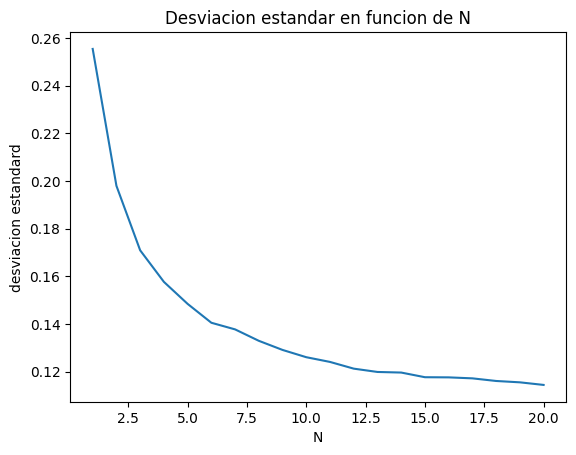

In [97]:
# creamos lista de N
N = list(range(1, 21))

#ploteamos lo pedido
plt.plot(N, df_std)
plt.xlabel('N')
plt.ylabel('desviacion estandard')
plt.title('Desviacion estandar en funcion de N')
plt.show()

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** se ven 5 lineas de emision lo cual se explica dado que con el proceso anterior, disminuimos el ruido de los espectros y asi pudimos ver emisiones que en un inicio estaban siendo tapadas.

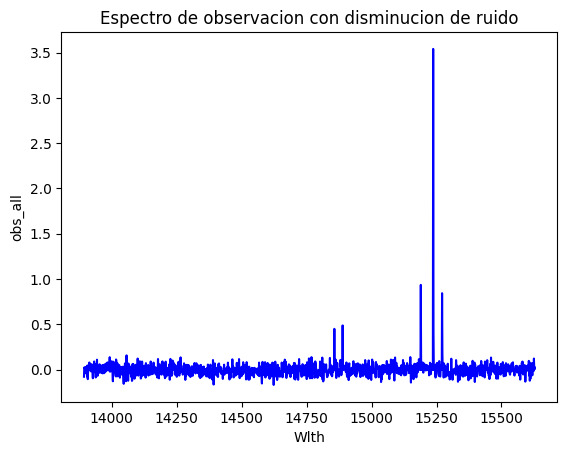

In [95]:
# Ploteamos lo pedido
plt.plot(Wlth, prom, color='blue')
plt.xlabel('Wlth')
plt.ylabel('obs_all')
plt.title('Espectro de observacion con disminucion de ruido')
plt.show()